In [237]:
import os, json, re
import matplotlib.pyplot as plt

%matplotlib widget

def lmap(f, iter):
    return list(map(f, iter))

def lfilt(f, iter):
    return list(filter(f, iter))


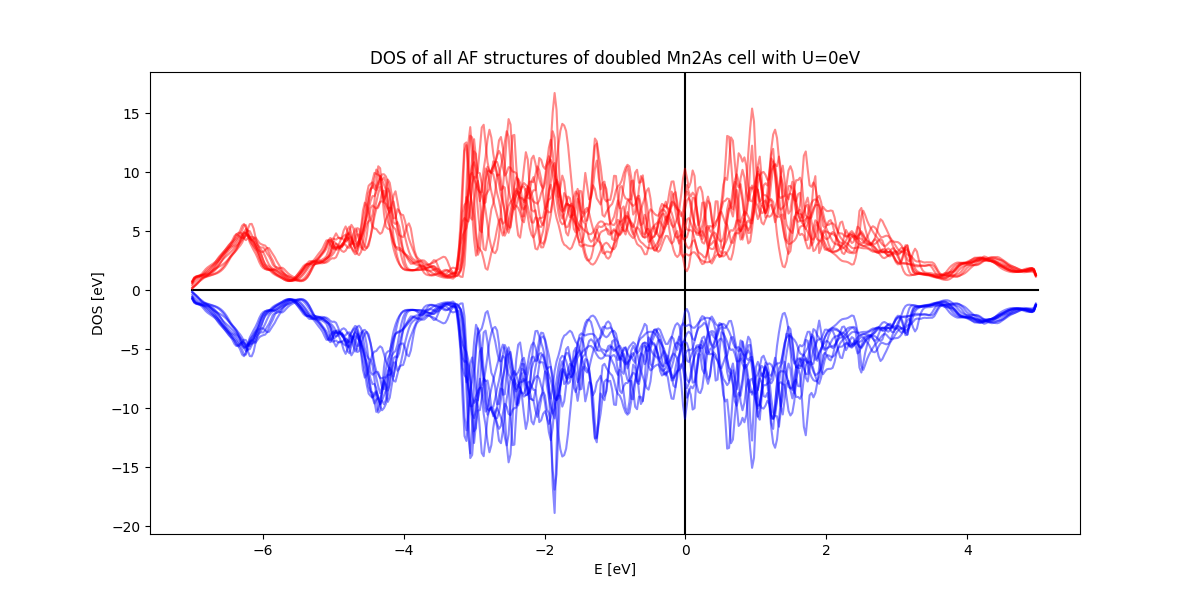

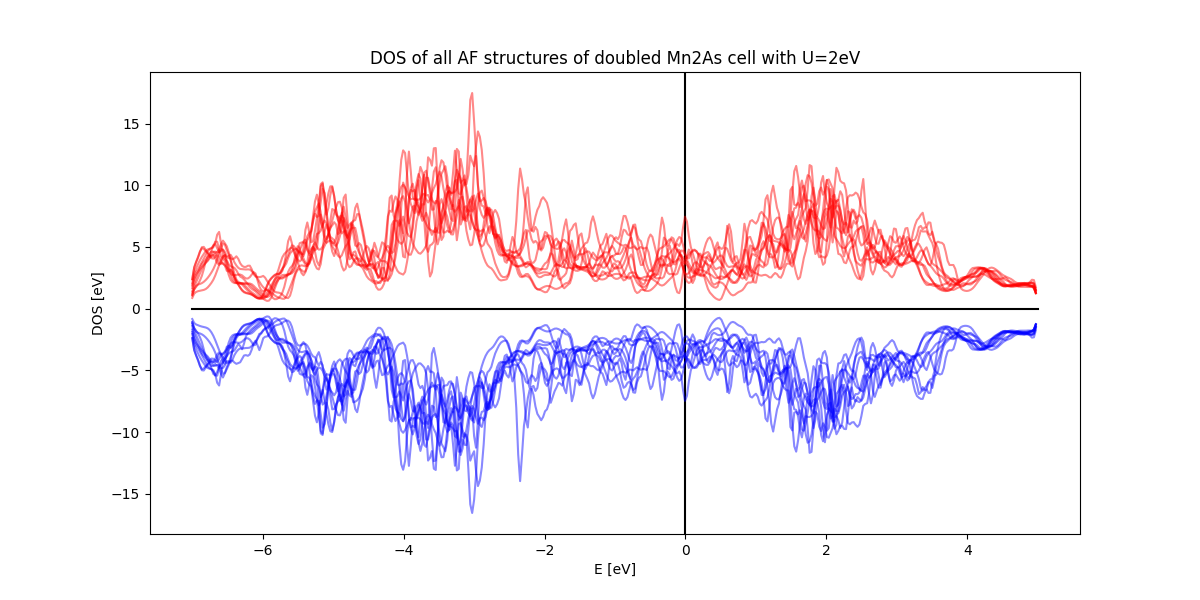

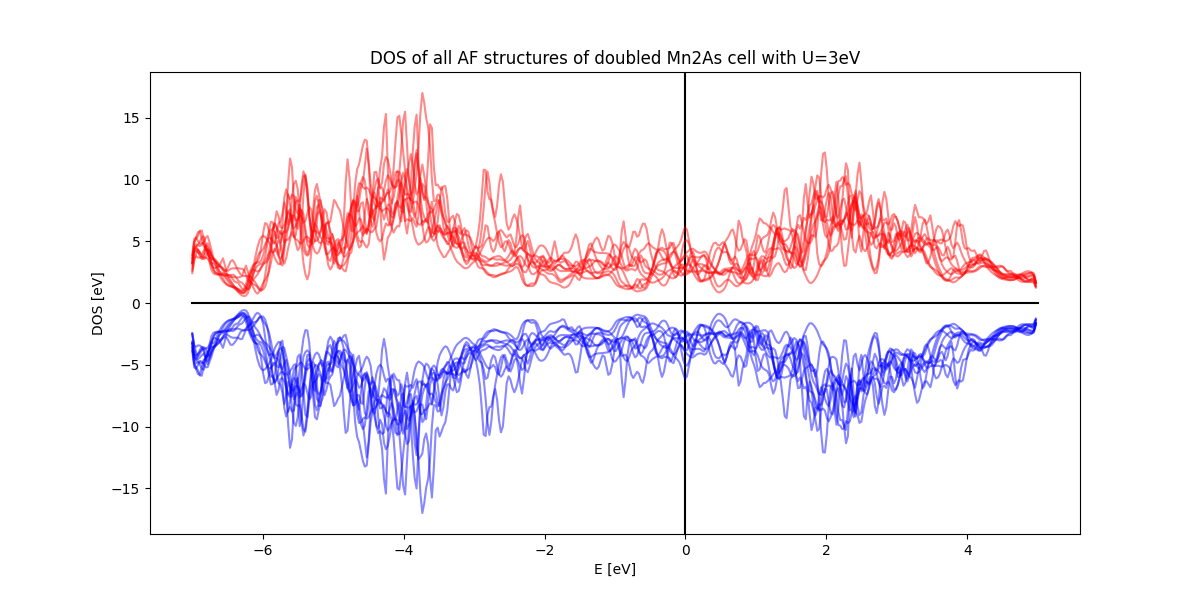

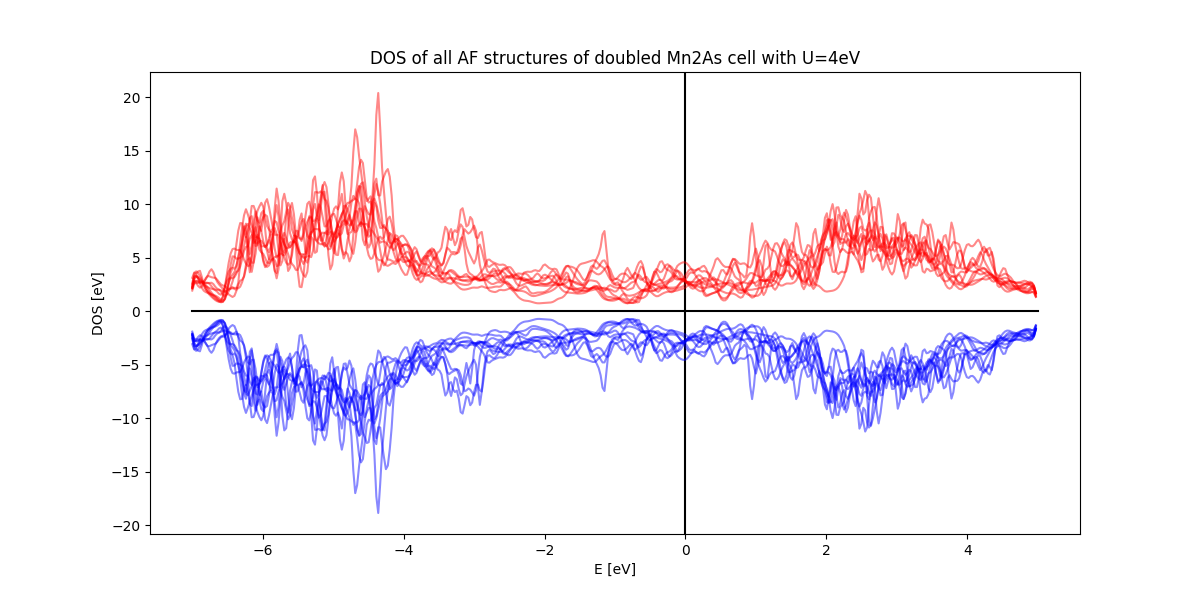

In [238]:
for u in [0, 2, 3, 4]:
    files = os.listdir("mn2as_DOS")
    files = lfilt(lambda f: f"U={u}" in f and ("AF" in f), files)

    plt.figure(figsize=(12, 6))
    plt.plot([-7,5], [0,0], "black")
    plt.title(f"DOS of all AF structures of doubled Mn2As cell with U={u}eV")
    plt.axvline(0, color="black")
    plt.xlabel("E [eV]")
    plt.ylabel("DOS [eV]")

    for file in files:
        m = -1 if "dn" in file else 1
        with open("mn2as_DOS/" + file, "r") as reader:
            lines = reader.readlines()[3:]
            lines = lmap(lambda line: line.replace("  ", " "), lines)
            lines = lmap(lambda line: line.replace("  ", " "), lines)
            lines = lmap(lambda line: line.replace("  ", " "), lines)
            lines = lmap(lambda line: line.strip(), lines)

            xs = lmap(lambda line: float(line.split(" ")[0]), lines)
            ys = lmap(lambda line: m * float(line.split(" ")[1]), lines)

            plt.plot(xs,ys, "#ff000077" if m == 1 else "#0000ff77")
    plt.savefig(f"mn2as_DOS_all_mag_U_{u}")


['mn2as_DOS_U=0_AF2.dos1evdn', 'mn2as_DOS_U=0_AF2.dos1evup', 'mn2as_DOS_U=0_AF3.dos1evdn', 'mn2as_DOS_U=0_AF3.dos1evup']
['mn2as_DOS_U=2_AF2_U=2.dos1evdn', 'mn2as_DOS_U=2_AF2_U=2.dos1evup', 'mn2as_DOS_U=2_AF3_U=2.dos1evdn', 'mn2as_DOS_U=2_AF3_U=2.dos1evup']
['mn2as_DOS_U=3_AF2_U=3.dos1evdn', 'mn2as_DOS_U=3_AF2_U=3.dos1evup', 'mn2as_DOS_U=3_AF3_U=3.dos1evdn', 'mn2as_DOS_U=3_AF3_U=3.dos1evup']
['mn2as_DOS_U=4_AF2_U=4.dos1evdn', 'mn2as_DOS_U=4_AF2_U=4.dos1evup', 'mn2as_DOS_U=4_AF3_U=4.dos1evdn', 'mn2as_DOS_U=4_AF3_U=4.dos1evup']


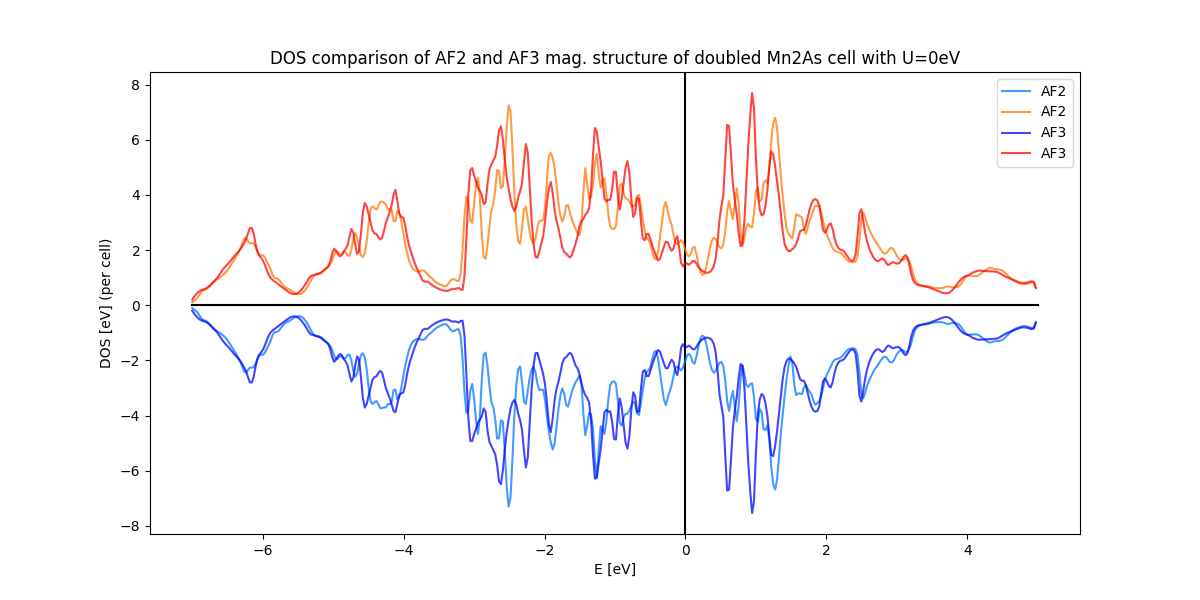

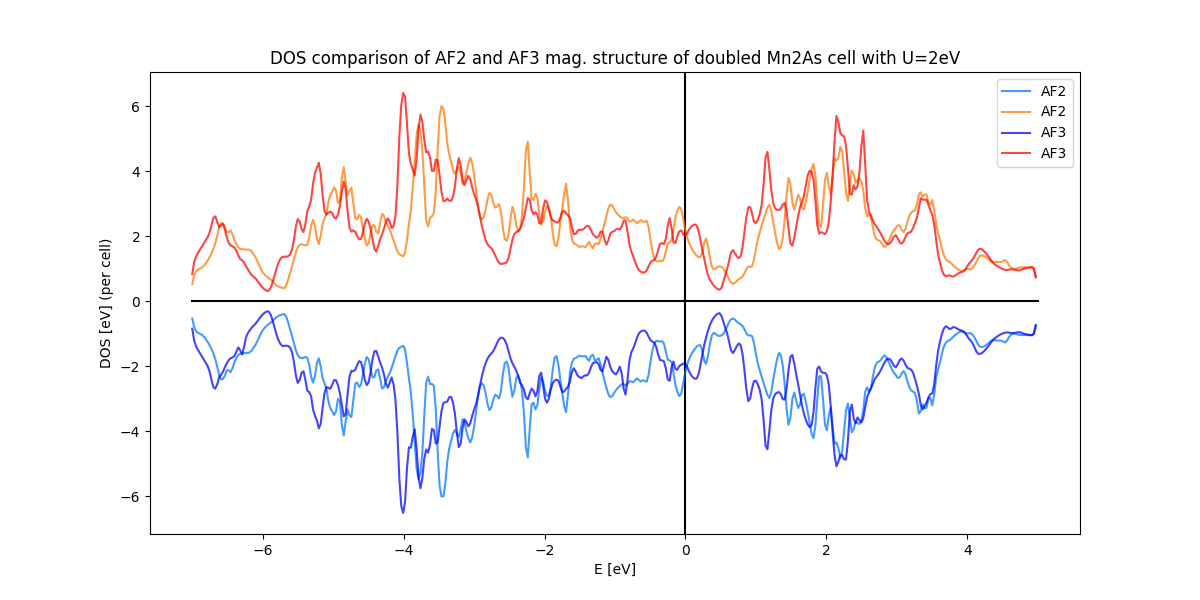

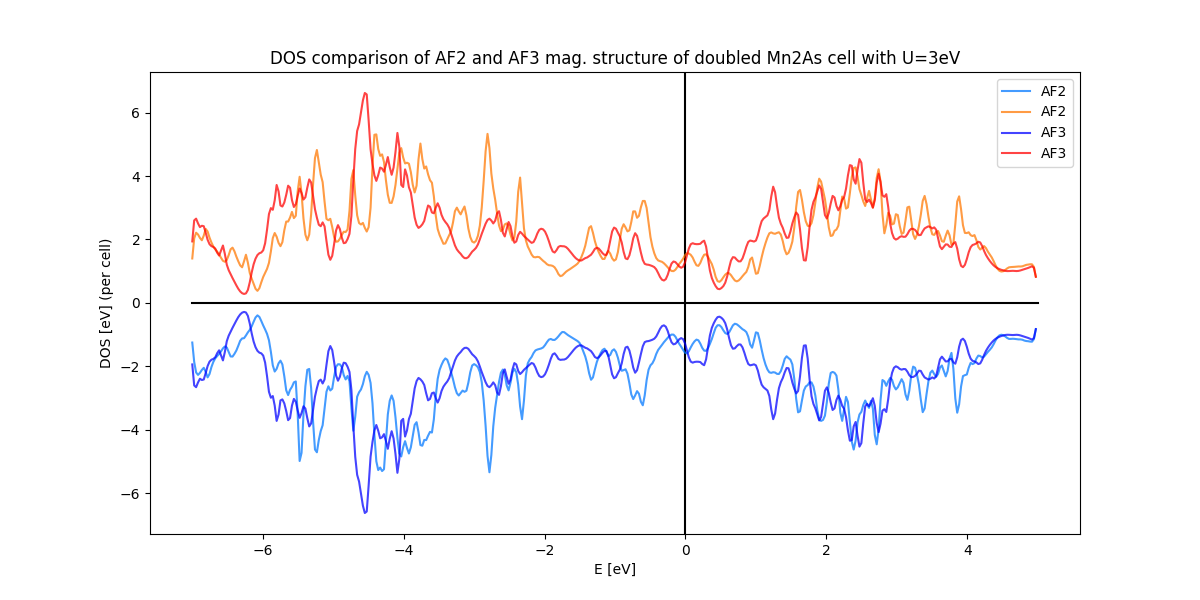

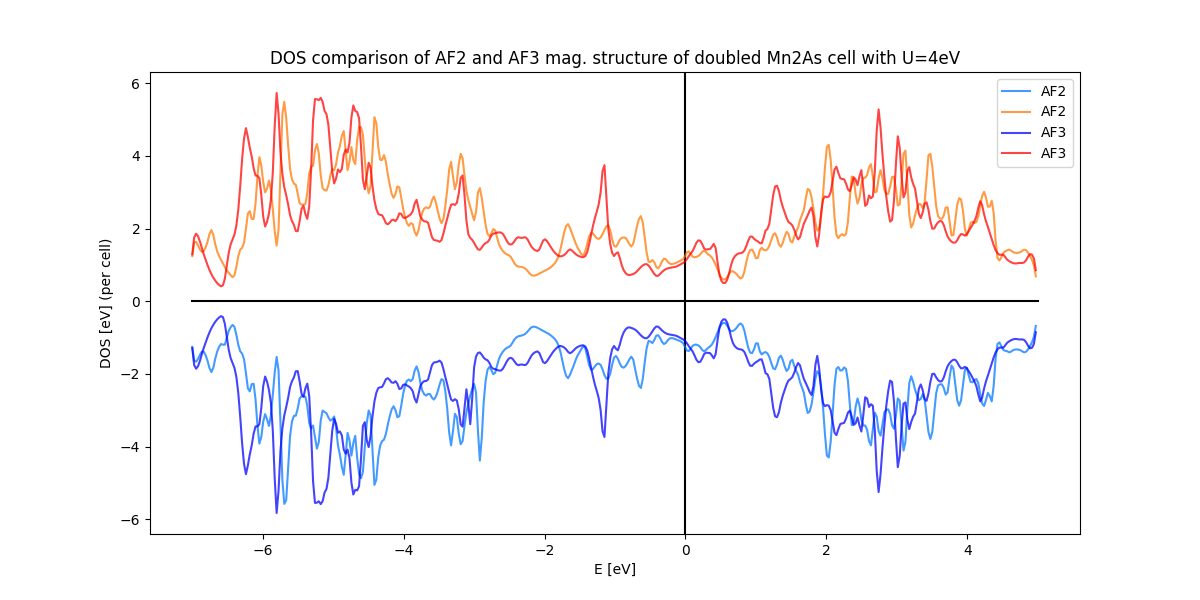

In [239]:
for u in [0, 2, 3, 4]:
    files = os.listdir("mn2as_DOS")
    files = lfilt(lambda f: f"U={u}" in f and ("AF2" in f or "AF3" in f), files)
    print(files)


    plt.figure(figsize=(12, 6))
    plt.plot([-7,5], [0,0], "black")
    plt.title(f"DOS comparison of AF2 and AF3 mag. structure of doubled Mn2As cell with U={u}eV")
    plt.axvline(0, color="black")
    plt.xlabel("E [eV]")
    plt.ylabel("DOS [eV] (per cell)")

    for file in files:
        m = -1 if "dn" in file else 1
        with open("mn2as_DOS/" + file, "r") as reader:
            lines = reader.readlines()[3:]
            lines = lmap(lambda line: line.replace("  ", " "), lines)
            lines = lmap(lambda line: line.replace("  ", " "), lines)
            lines = lmap(lambda line: line.replace("  ", " "), lines)
            lines = lmap(lambda line: line.strip(), lines)

            xs = lmap(lambda line: float(line.split(" ")[0]), lines)
            ys = lmap(lambda line: m * float(line.split(" ")[1])/2, lines)

            if "AF2" in file:
                plt.plot(xs,ys, "#ff7700bb" if m == 1 else "#0077ffbb", label = "AF2")
            else:
                plt.plot(xs,ys, "#ff0000bb" if m == 1 else "#0000ffbb", label = "AF3")
    
    plt.legend()
    plt.savefig(f"mn2as_AF3vsAF2_U_{u}")


['mn2as_DOS_U=0_Fi.dos1evdn', 'mn2as_DOS_U=0_Fi.dos1evup']
['mn2as_DOS_U=2_Fi_U=2.dos1evdn', 'mn2as_DOS_U=2_Fi_U=2.dos1evup']
['mn2as_DOS_U=3_Fi_U=3.dos1evdn', 'mn2as_DOS_U=3_Fi_U=3.dos1evup']
['mn2as_DOS_U=4_Fi_U=4.dos1evdn', 'mn2as_DOS_U=4_Fi_U=4.dos1evup']


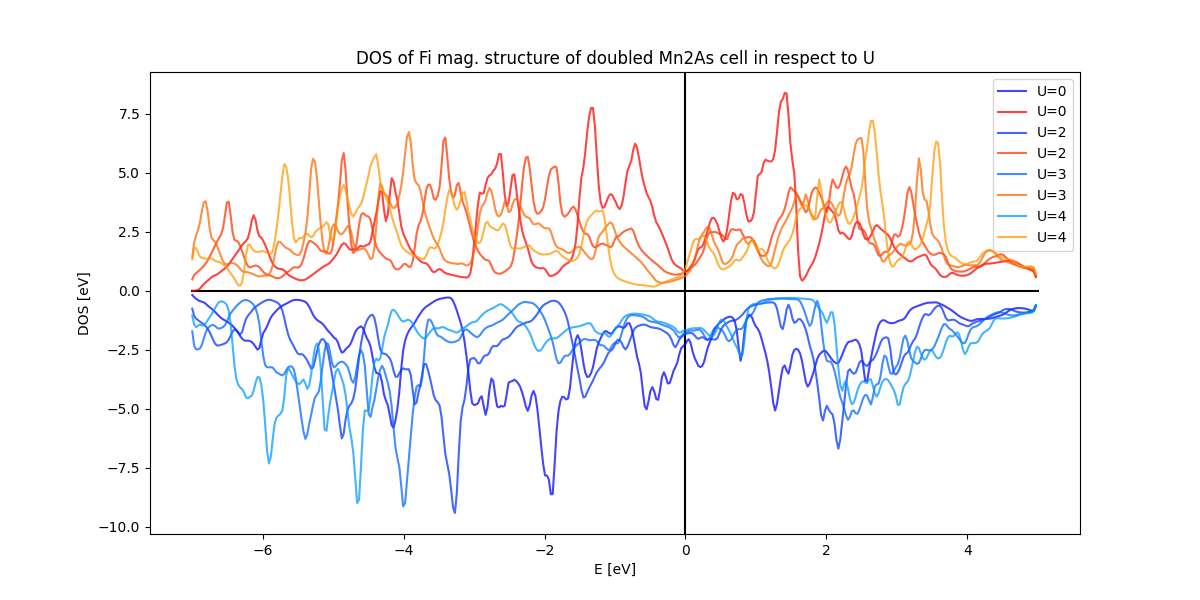

In [240]:
plt.figure(figsize=(12, 6))
plt.plot([-7,5], [0,0], "black")
plt.title(f"DOS of Fi mag. structure of doubled Mn2As cell in respect to U")
plt.axvline(0, color="black")
plt.xlabel("E [eV]")
plt.ylabel("DOS [eV]")

for u in [0, 2, 3, 4]:
    files = os.listdir("mn2as_DOS")
    files = lfilt(lambda f: f"U={u}" in f and ("Fi" in f), files)
    print(files)

    for file in files:
        m = -1 if "dn" in file else 1
        with open("mn2as_DOS/" + file, "r") as reader:
            lines = reader.readlines()[3:]
            lines = lmap(lambda line: line.replace("  ", " "), lines)
            lines = lmap(lambda line: line.replace("  ", " "), lines)
            lines = lmap(lambda line: line.replace("  ", " "), lines)
            lines = lmap(lambda line: line.strip(), lines)

            xs = lmap(lambda line: float(line.split(" ")[0]), lines)
            ys = lmap(lambda line: m * float(line.split(" ")[1])/2, lines)

            if u == 0:
                plt.plot(xs,ys, "#ff0000bb" if m == 1 else "#0000ffbb", label = "U=0")
            elif u == 2:
                plt.plot(xs,ys, "#ff3300bb" if m == 1 else "#0033ffbb", label = "U=2")
            elif u == 3:
                plt.plot(xs,ys, "#ff6600bb" if m == 1 else "#0066ffbb", label = "U=3")
            elif u == 4:
                plt.plot(xs,ys, "#ff9900bb" if m == 1 else "#0099ffbb", label = "U=4")
    
    plt.legend()
    plt.savefig(f"mn2as_DOS_of_Fi_in_respect_to_U")


['mn2as_DOS_U=0_F.dos1evdn', 'mn2as_DOS_U=0_F.dos1evup']
['mn2as_DOS_U=2_F_U=2.dos1evdn', 'mn2as_DOS_U=2_F_U=2.dos1evup']
['mn2as_DOS_U=3_F_U=3.dos1evdn', 'mn2as_DOS_U=3_F_U=3.dos1evup']
['mn2as_DOS_U=4_F_U=4.dos1evdn', 'mn2as_DOS_U=4_F_U=4.dos1evup']


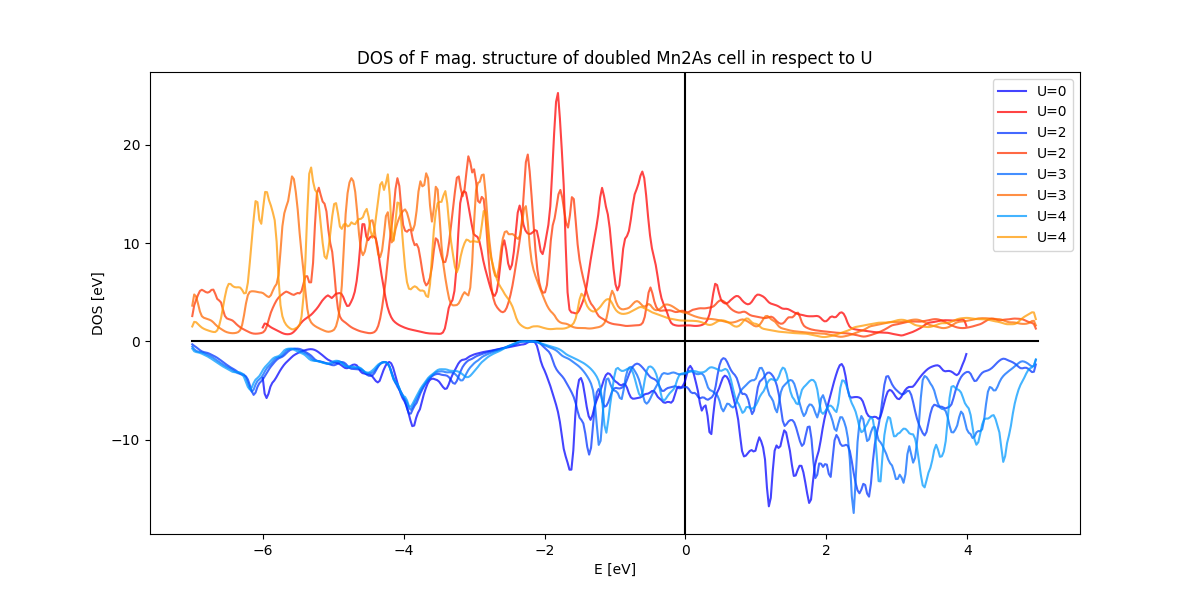

In [241]:
plt.figure(figsize=(12, 6))
plt.plot([-7,5], [0,0], "black")
plt.title(f"DOS of F mag. structure of doubled Mn2As cell in respect to U")
plt.axvline(0, color="black")
plt.xlabel("E [eV]")
plt.ylabel("DOS [eV]")

for u in [0, 2, 3, 4]:
    files = os.listdir("mn2as_DOS")
    files = lfilt(lambda f: f"U={u}" in f and ("F." in f or "F_" in f), files)
    print(files)

    for file in files:
        m = -1 if "dn" in file else 1
        with open("mn2as_DOS/" + file, "r") as reader:
            lines = reader.readlines()[3:]
            lines = lmap(lambda line: line.replace("  ", " "), lines)
            lines = lmap(lambda line: line.replace("  ", " "), lines)
            lines = lmap(lambda line: line.replace("  ", " "), lines)
            lines = lmap(lambda line: line.strip(), lines)

            xs = lmap(lambda line: float(line.split(" ")[0]), lines)
            ys = lmap(lambda line: m * float(line.split(" ")[1]), lines)

            if u == 0:
                plt.plot(xs,ys, "#ff0000bb" if m == 1 else "#0000ffbb", label = "U=0")
            elif u == 2:
                plt.plot(xs,ys, "#ff3300bb" if m == 1 else "#0033ffbb", label = "U=2")
            elif u == 3:
                plt.plot(xs,ys, "#ff6600bb" if m == 1 else "#0066ffbb", label = "U=3")
            elif u == 4:
                plt.plot(xs,ys, "#ff9900bb" if m == 1 else "#0099ffbb", label = "U=4")
    
    plt.legend()
    plt.savefig(f"mn2as_DOS_of_F_in_respect_to_U")


['mn2as_DOS_U=0_AF1.dos1evdn', 'mn2as_DOS_U=0_AF1.dos1evup', 'mn2as_DOS_U=0_AF10.dos1evdn', 'mn2as_DOS_U=0_AF10.dos1evup', 'mn2as_DOS_U=0_AF2.dos1evdn', 'mn2as_DOS_U=0_AF2.dos1evup', 'mn2as_DOS_U=0_AF3.dos1evdn', 'mn2as_DOS_U=0_AF3.dos1evup', 'mn2as_DOS_U=0_AF4.dos1evdn', 'mn2as_DOS_U=0_AF4.dos1evup', 'mn2as_DOS_U=0_AF5.dos1evdn', 'mn2as_DOS_U=0_AF5.dos1evup', 'mn2as_DOS_U=0_AF6.dos1evdn', 'mn2as_DOS_U=0_AF6.dos1evup', 'mn2as_DOS_U=0_AF7.dos1evdn', 'mn2as_DOS_U=0_AF7.dos1evup', 'mn2as_DOS_U=0_AF8.dos1evdn', 'mn2as_DOS_U=0_AF8.dos1evup', 'mn2as_DOS_U=0_AF9.dos1evdn', 'mn2as_DOS_U=0_AF9.dos1evup']


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17664\191831301.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


['mn2as_DOS_U=2_AF10_U=2.dos1evdn', 'mn2as_DOS_U=2_AF10_U=2.dos1evup', 'mn2as_DOS_U=2_AF1_U=2.dos1evdn', 'mn2as_DOS_U=2_AF1_U=2.dos1evup', 'mn2as_DOS_U=2_AF2_U=2.dos1evdn', 'mn2as_DOS_U=2_AF2_U=2.dos1evup', 'mn2as_DOS_U=2_AF3_U=2.dos1evdn', 'mn2as_DOS_U=2_AF3_U=2.dos1evup', 'mn2as_DOS_U=2_AF4_U=2.dos1evdn', 'mn2as_DOS_U=2_AF4_U=2.dos1evup', 'mn2as_DOS_U=2_AF5_U=2.dos1evdn', 'mn2as_DOS_U=2_AF5_U=2.dos1evup', 'mn2as_DOS_U=2_AF6_U=2.dos1evdn', 'mn2as_DOS_U=2_AF6_U=2.dos1evup', 'mn2as_DOS_U=2_AF7_U=2.dos1evdn', 'mn2as_DOS_U=2_AF7_U=2.dos1evup', 'mn2as_DOS_U=2_AF8_U=2.dos1evdn', 'mn2as_DOS_U=2_AF8_U=2.dos1evup', 'mn2as_DOS_U=2_AF9_U=2.dos1evdn', 'mn2as_DOS_U=2_AF9_U=2.dos1evup']
['mn2as_DOS_U=3_AF10_U=3.dos1evdn', 'mn2as_DOS_U=3_AF10_U=3.dos1evup', 'mn2as_DOS_U=3_AF1_U=3.dos1evdn', 'mn2as_DOS_U=3_AF1_U=3.dos1evup', 'mn2as_DOS_U=3_AF2_U=3.dos1evdn', 'mn2as_DOS_U=3_AF2_U=3.dos1evup', 'mn2as_DOS_U=3_AF3_U=3.dos1evdn', 'mn2as_DOS_U=3_AF3_U=3.dos1evup', 'mn2as_DOS_U=3_AF4_U=3.dos1evdn', 'mn2as_D

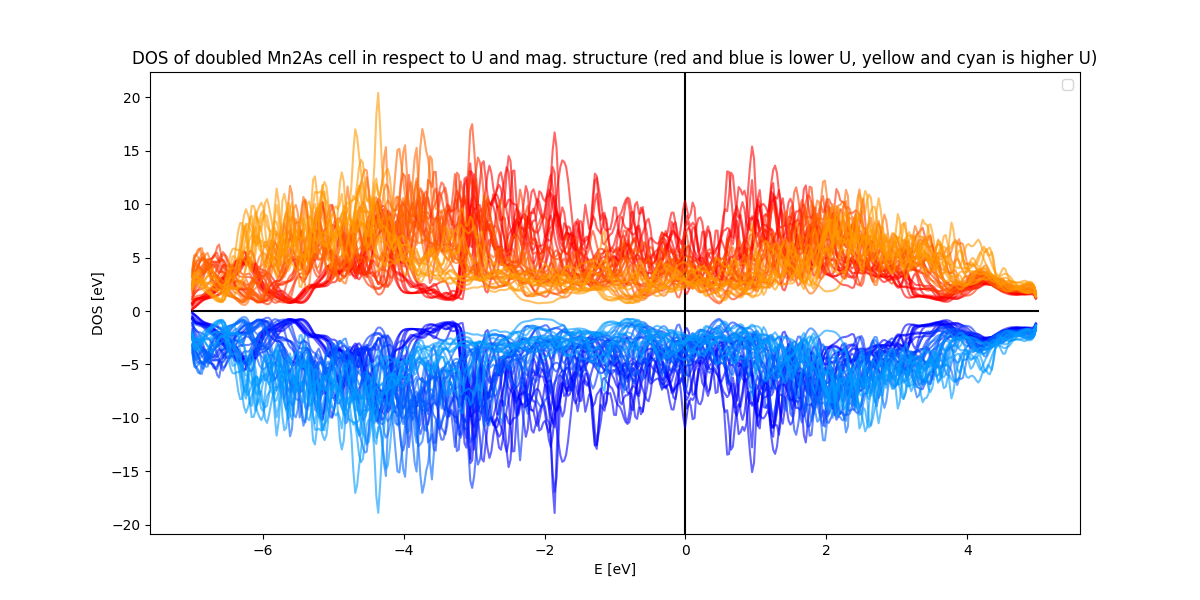

In [242]:
plt.figure(figsize=(12, 6))
plt.plot([-7,5], [0,0], "black")
plt.title(f"DOS of doubled Mn2As cell in respect to U and mag. structure (red and blue is lower U, yellow and cyan is higher U)")
plt.axvline(0, color="black")
plt.xlabel("E [eV]")
plt.ylabel("DOS [eV]")

for u in [0, 2, 3, 4]:
    files = os.listdir("mn2as_DOS")
    files = lfilt(lambda f: f"U={u}" in f and ("AF" in f), files)
    print(files)

    for file in files:
        m = -1 if "dn" in file else 1
        with open("mn2as_DOS/" + file, "r") as reader:
            lines = reader.readlines()[3:]
            lines = lmap(lambda line: line.replace("  ", " "), lines)
            lines = lmap(lambda line: line.replace("  ", " "), lines)
            lines = lmap(lambda line: line.replace("  ", " "), lines)
            lines = lmap(lambda line: line.strip(), lines)

            xs = lmap(lambda line: float(line.split(" ")[0]), lines)
            ys = lmap(lambda line: m * float(line.split(" ")[1]), lines)

            if u == 0:
                plt.plot(xs,ys, "#ff000099" if m == 1 else "#0000ff99")
            elif u == 2:
                plt.plot(xs,ys, "#ff330099" if m == 1 else "#0033ff99")
            elif u == 3:
                plt.plot(xs,ys, "#ff660099" if m == 1 else "#0066ff99")
            elif u == 4:
                plt.plot(xs,ys, "#ff990099" if m == 1 else "#0099ff99")
    
    plt.legend()
    plt.savefig(f"mn2as_DOS_dump")
